In [1]:
%pylab inline
import sys

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

rcParams['font.family'] = 'sans-serif'

sys.path.append('../')
from mederrata_spmf import PoissonMatrixFactorization


Populating the interactive namespace from numpy and matplotlib


In this notebook, we look at the $\mathcal{M}$-open setting, where the generating process is in the span of models.

# Generate a random matrices V, W

For V, assume that 10 variables share a factor structure and the other 20 are noise

In [2]:
N = 50000
D_factor = 10
D_noise = 20
D = D_factor + D_noise
P = 3

V = np.abs(np.random.normal(1.5, 0.5, size=(P,D_factor)))
Z = np.abs(np.random.normal(0.5, size=(N,P)))

ZV = Z.dot(V)

X = np.zeros((N, D_factor+D_noise))
X = np.random.poisson(1.,size=(N,D_noise+D_factor))
X[:, ::3] = np.random.poisson(ZV*np.exp(ZV/np.mean(ZV)/10)+(ZV/np.mean(ZV)/10)**2)

In [3]:
# Test taking in from tf.dataset, don't pre-batch
data = tf.data.Dataset.from_tensor_slices(
    {
        'counts': X,
        'indices': np.arange(N),
        'normalization': np.ones(N)
    })

data = data.batch(10000)

In [4]:
# strategy = tf.distribute.MirroredStrategy()
strategy = None
factor = PoissonMatrixFactorization(
    data, latent_dim=P, strategy=strategy,
    u_tau_scale=1.0/np.sqrt(D*N),
    dtype=tf.float64)
# Test to make sure sampling works


Looping through the entire dataset once to get some stats
Feature dim: 30 -> Latent dim 3


In [5]:
losses = factor.calibrate_advi(
    num_steps=200, learning_rate=.05)




Initial loss: 54.67686603702436
Epoch 1: average-batch loss: 53.621038106342326 last batch loss: 53.10870158742196
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-1
Epoch 2: average-batch loss: 52.871464762588914 last batch loss: 52.88009303743571
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-2
Epoch 3: average-batch loss: 52.6624425822553 last batch loss: 52.822899210523325
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-3
Epoch 4: average-batch loss: 52.655916456794536 last batch loss: 52.817759594164
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-4
Epoch 5: average-batch loss: 52.64692251049128 last batch loss: 52.81417717821619
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-5
Epoch 6: average-

Epoch 44: average-batch loss: 47.651067674548756 last batch loss: 47.67616191904386
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-44
Epoch 45: average-batch loss: 47.64900799013691 last batch loss: 47.676914964679796
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-45
Epoch 46: average-batch loss: 47.647710080873516 last batch loss: 47.67352702853139
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-46
Epoch 47: average-batch loss: 47.64584657183282 last batch loss: 47.670691532822914
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-47
Epoch 48: average-batch loss: 47.64430993959629 last batch loss: 47.67042678501789
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-48
Epoch 49: average-batch loss: 47.641

Epoch 92: average-batch loss: 47.22491888691535 last batch loss: 47.244807083347474
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-82
Epoch 93: average-batch loss: 47.20298186738778 last batch loss: 47.232468922235384
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-83
Epoch 94: average-batch loss: 47.184073878620424 last batch loss: 47.220772133282345
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-84
Epoch 95: average-batch loss: 47.17072305230106 last batch loss: 47.209417675118836
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-85
Epoch 96: average-batch loss: 47.15786770582756 last batch loss: 47.18093482287662
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-86
Epoch 97: average-batch loss: 47.14

Epoch 135: average-batch loss: 46.99713511212151 last batch loss: 47.03765148784728
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-125
Epoch 136: average-batch loss: 46.99325785505731 last batch loss: 47.032407665399944
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-126
Epoch 137: average-batch loss: 46.99279518085299 last batch loss: 47.03037256522699
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-127
Epoch 138: average-batch loss: 46.99385574026773 last batch loss: 47.035419844390326
We are in a loss plateau learning rate: 0.049005 loss: 46.98269931258243
Restoring from a checkpoint - loss: 46.98506529054082
Epoch 139: average-batch loss: 46.993058688740945 last batch loss: 47.03593093260833
Epoch 140: average-batch loss: 46.989776162076154 last batch loss: 47.02799362124958
Saved a checkpoint: ./.tf_ckpts/dee

Epoch 188: average-batch loss: 46.962747083557765 last batch loss: 47.001876833610226
Epoch 189: average-batch loss: 46.96240588708576 last batch loss: 47.00152619364101
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-153
Epoch 190: average-batch loss: 46.962126696523455 last batch loss: 46.999931794887154
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-154
Epoch 191: average-batch loss: 46.96130747146755 last batch loss: 47.00211718294837
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7478-409f-8148-367a8ff9d44b-155
Epoch 192: average-batch loss: 46.9619381553039 last batch loss: 47.00501127703533
Epoch 193: average-batch loss: 46.96177538314053 last batch loss: 46.99993120390037
Epoch 194: average-batch loss: 46.96041368441091 last batch loss: 46.99928865581979
Saved a checkpoint: ./.tf_ckpts/dee33e24-7478-409f-8148-367a8ff9d44b/dee33e24-7

In [6]:
waic = factor.waic()
print(waic)

{'waic': 1352797.9570285792, 'se': 1747.0389410130274, 'lppd': -467450.20747884153, 'pwaic': 208948.77103544804}


In [7]:
surrogate_samples = factor.surrogate_distribution.sample(1000)
if 's' in surrogate_samples.keys():
    weights = surrogate_samples['s']/tf.reduce_sum(surrogate_samples['s'],-2,keepdims=True)
    intercept_data = az.convert_to_inference_data(
        {
            r"$\varphi_i/\eta_i$": 
                (tf.squeeze(surrogate_samples['w'])*weights[:,-1,:]).numpy().T})
else:
    intercept_data = az.convert_to_inference_data(
    {
        r"$\varphi_i/\eta_i$": 
            (tf.squeeze(surrogate_samples['w'])).numpy().T})

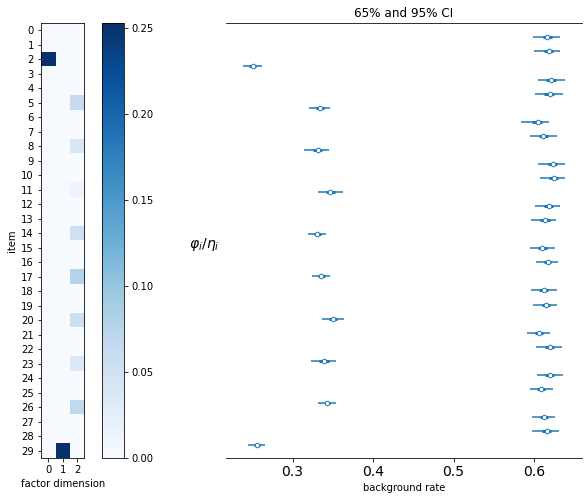

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
D = factor.feature_dim
pcm = ax[0].imshow(factor.encoding_matrix().numpy()[::-1,:], vmin=0, cmap="Blues")
ax[0].set_yticks(np.arange(D))
ax[0].set_yticklabels(np.arange(D))
ax[0].set_ylabel("item")
ax[0].set_xlabel("factor dimension")
ax[0].set_xticks(np.arange(P))
ax[0].set_xticklabels(np.arange(P))

fig.colorbar(pcm, ax=ax[0], orientation = "vertical")
az.plot_forest(intercept_data, ax=ax[1])
ax[1].set_xlabel("background rate")
ax[1].set_ylim((-0.014,.466))
ax[1].set_title("65% and 95% CI")
#plt.savefig('mix_nonlinear_factorization_sepmf.pdf', bbox_inches='tight')
plt.show()
